In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from mvl2 import genData2 as genData
from torch import tensor

In [28]:
simParams = genData.genParams(pis=tensor([.1, .1, .05]), rrMeans=tensor([3., 2.]), afMean = tensor(1e-4), pDs = tensor([.01, .01]), afShape=tensor(50.), nCases=tensor([1.5e4, 1.5e4, 4e3]), nCtrls=tensor(5e4), covShared=tensor([ [1, .95], [.95, 1] ]), covSingle=tensor([ [1., 0.], [0., 1.] ]), meanEffectCovarianceScale=tensor(.01))[0]
simParams["pDs"] = simParams["pDs"][0:2]
simParams

{'nGenes': 20000,
 'nCases': tensor([15000., 15000.,  4000.]),
 'nCtrls': tensor(50000.),
 'pDs': tensor([0.0100, 0.0100]),
 'diseaseFractions': tensor([0.1000, 0.1000, 0.0500]),
 'rrShape': tensor(10.),
 'rrMeans': tensor([3., 2.]),
 'afShape': tensor(50.),
 'afMean': tensor(1.0000e-04),
 'covShared': tensor([[1.0000, 0.9500],
         [0.9500, 1.0000]]),
 'covSingle': tensor([[1., 0.],
         [0., 1.]]),
 'meanEffectCovarianceScale': tensor(0.0100),
 'rrtype': 'default'}

In [29]:
sim1 = genData.v6liability(**simParams)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
pDsWithBoth tensor([0.0100, 0.0100, 0.0067], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0300, 0.0200])
pdvthresh tensor([1.8808, 2.0537])
meanEffect tensor([0.4456, 0.2726])
meanEffectsAcrossAllGenes tensor([0.4456, 0.2726])
allEffects tensor([[-0.5912, -0.3874],
        [-0.5445, -0.2904],
        [-0.4218, -0.1910],
        ...,
        [-0.5521, -0.4431],
        [-0.5510, -0.3850],
        [-0.4668, -0.2893]])
allEffects[i] tensor([-0.5912, -0.3874])
PDBothGivenV.mean tensor(0.0171, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(2.5554, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0306, 0.0205, 0.0171], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.94901879]
 [0.94901879 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.97607459]
 [0.97607459 1.        ]]
PDBoth1GivenV tensor([0.0272, 0.0176, 0.0116,  ..., 0.0264, 0.0258, 

In [30]:
# with scaling of the covariance matrix when generating P(DBoth), this simply doesn't work
# pdBothGenerator = WrappedMVN(MultivariateNormal(tensor([0, 0]), shared_cov_scaled))
# PDBoth = tensor(pdBothGenerator.cdf(tensor([thresh1, thresh2])))
# pDsWithBoth = tensor([*pDs, PDBoth])
sim2 = genData.v6liability2(**simParams)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1., 0.],
        [0., 1.]])
pDsWithBoth tensor([1.0000e-02, 1.0000e-02, 1.0000e-04], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0300, 0.0200])
pdvthresh tensor([1.8808, 2.0537])
meanEffect tensor([0.4456, 0.2726])
meanEffectsAcrossAllGenes tensor([0.4456, 0.2726])
allEffects tensor([[-0.4690, -0.3061],
        [-0.4049, -0.2729],
        [-0.4867, -0.2935],
        ...,
        [-0.5829, -0.4612],
        [-0.5425, -0.3836],
        [-0.6720, -0.5061]])
allEffects[i] tensor([-0.4690, -0.3061])
PDBothGivenV.mean tensor(0.0171, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(171.4065, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0306, 0.0205, 0.0171], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.94829917]
 [0.94829917 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.97567966]
 [0.97567966 1.        ]]
PDBoth1GivenV ten

In [31]:
# With the use of residual covariance, on both PDBoth generation, PDBoth|V, PDBoth|V1, PDBoth|V2
# This seems reasonable
# But: why not use genetic correlation?
# But: what happens when residual covariance isn't just 0?
sim3 = genData.v6liability2(**simParams)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1., 0.],
        [0., 1.]])
pDsWithBoth tensor([1.0000e-02, 1.0000e-02, 1.0000e-04], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0300, 0.0200])
pdvthresh tensor([1.8808, 2.0537])
meanEffect tensor([0.4456, 0.2726])
meanEffectsAcrossAllGenes tensor([0.4456, 0.2726])
allEffects tensor([[-0.3491, -0.1505],
        [-0.5115, -0.3364],
        [-0.5128, -0.3306],
        ...,
        [-0.3645, -0.1908],
        [-0.3094, -0.1617],
        [-0.6709, -0.4207]])
allEffects[i] tensor([-0.3491, -0.1505])
PDBothGivenV.mean tensor(0.0171, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(171.3695, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0306, 0.0205, 0.0171], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.94866299]
 [0.94866299 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.97588382]
 [0.97588382 1.        ]]
PDBoth1GivenV ten

In [32]:
simParams2 = genData.genParams(pis=tensor([.1, .1, .05]), rrMeans=tensor([5., 2.]), afMean = tensor(1e-4), pDs = tensor([.01, .01]), afShape=tensor(50.), nCases=tensor([1.5e4, 1.5e4, 4e3]), nCtrls=tensor(5e4), covShared=tensor([ [1, .95], [.95, 1] ]), covSingle=tensor([ [1., .5], [.5, 1.] ]), meanEffectCovarianceScale=tensor(.01))[0]
simParams2["pDs"] = simParams["pDs"][0:2]
simParams2

{'nGenes': 20000,
 'nCases': tensor([15000., 15000.,  4000.]),
 'nCtrls': tensor(50000.),
 'pDs': tensor([0.0100, 0.0100]),
 'diseaseFractions': tensor([0.1000, 0.1000, 0.0500]),
 'rrShape': tensor(10.),
 'rrMeans': tensor([5., 2.]),
 'afShape': tensor(50.),
 'afMean': tensor(1.0000e-04),
 'covShared': tensor([[1.0000, 0.9500],
         [0.9500, 1.0000]]),
 'covSingle': tensor([[1.0000, 0.5000],
         [0.5000, 1.0000]]),
 'meanEffectCovarianceScale': tensor(0.0100),
 'rrtype': 'default'}

In [33]:
sim4 = genData.v6liability2(**simParams2)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1.0000, 0.5000],
        [0.5000, 1.0000]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0013], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.6739, -0.2165],
        [-0.7634, -0.3634],
        [-0.6017, -0.1836],
        ...,
        [-0.8355, -0.4064],
        [-0.6271, -0.2222],
        [-0.4784, -0.0431]])
allEffects[i] tensor([-0.6739, -0.2165])
PDBothGivenV.mean tensor(0.0194, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(14.9867, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0508, 0.0205, 0.0194], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.94737252]
 [0.94737252 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.95975758]
 [0.95975758 1.        ]]
PDBoth1GivenV 

In [34]:
# Now the same, except for PDBoth|V, PDBoth|V1, PDBoth|V2 sample use idnetity covariance matrix
sim5 = genData.v6liability2(**simParams2)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1.0000, 0.5000],
        [0.5000, 1.0000]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0013], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.7115, -0.3450],
        [-0.7959, -0.3859],
        [-0.6815, -0.2753],
        ...,
        [-0.7774, -0.3171],
        [-0.6378, -0.2253],
        [-0.6918, -0.2600]])
allEffects[i] tensor([-0.7115, -0.3450])
PDBothGivenV.mean tensor(0.0195, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(15.0358, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0509, 0.0205, 0.0195], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.94953983]
 [0.94953983 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.96133531]
 [0.96133531 1.        ]]
PDBoth1GivenV 

In [35]:
# Now with covShared on PDBoth|V, but residualCovariance on PDBoth|V1, PDBoth|V2
sim6 = genData.v6liability2(**simParams2)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1.0000, 0.5000],
        [0.5000, 1.0000]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0013], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.7437, -0.3383],
        [-0.5992, -0.2041],
        [-0.6614, -0.2987],
        ...,
        [-0.6388, -0.2114],
        [-0.5639, -0.1896],
        [-0.5985, -0.1522]])
allEffects[i] tensor([-0.7437, -0.3383])
PDBothGivenV.mean tensor(0.0195, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(15.0359, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0509, 0.0205, 0.0195], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.        0.9493537]
 [0.9493537 1.       ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.96123976]
 [0.96123976 1.        ]]
PDBoth1GivenV tens

In [36]:
# This looks reasonable. Now let's see the effect of reduced covShared 
import copy
simParams3 = copy.copy(simParams2)
simParams3["covShared"] = tensor([[1.0, .7], [.7, 1.0]])
simParams3

{'nGenes': 20000,
 'nCases': tensor([15000., 15000.,  4000.]),
 'nCtrls': tensor(50000.),
 'pDs': tensor([0.0100, 0.0100]),
 'diseaseFractions': tensor([0.1000, 0.1000, 0.0500]),
 'rrShape': tensor(10.),
 'rrMeans': tensor([5., 2.]),
 'afShape': tensor(50.),
 'afMean': tensor(1.0000e-04),
 'covShared': tensor([[1.0000, 0.7000],
         [0.7000, 1.0000]]),
 'covSingle': tensor([[1.0000, 0.5000],
         [0.5000, 1.0000]]),
 'meanEffectCovarianceScale': tensor(0.0100),
 'rrtype': 'default'}

In [37]:
sim7 = genData.v6liability2(**simParams3)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1.0000, 0.5000],
        [0.5000, 1.0000]])
pDsWithBoth tensor([0.0100, 0.0100, 0.0013], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.5098, -0.0713],
        [-0.6602, -0.1957],
        [-0.7802, -0.3811],
        ...,
        [-0.5584, -0.2035],
        [-0.5490, -0.1901],
        [-0.5980, -0.4255]])
allEffects[i] tensor([-0.5098, -0.0713])
PDBothGivenV.mean tensor(0.0107, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(8.2875, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0508, 0.0204, 0.0107], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.69434547]
 [0.69434547 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.86685972]
 [0.86685972 1.        ]]
PDBoth1GivenV t

In [46]:
# This looks reasonable. Now let's see the effect of reduced covShared 
import copy
simParams4 = copy.copy(simParams2)
simParams4["covShared"] = tensor([[1.0, .7], [.7, 1.0]])
simParams4["covSingle"] = tensor([[1.0, 0], [0, 1.0]])
simParams4

{'nGenes': 20000,
 'nCases': tensor([15000., 15000.,  4000.]),
 'nCtrls': tensor(50000.),
 'pDs': tensor([0.0100, 0.0100]),
 'diseaseFractions': tensor([0.1000, 0.1000, 0.0500]),
 'rrShape': tensor(10.),
 'rrMeans': tensor([5., 2.]),
 'afShape': tensor(50.),
 'afMean': tensor(1.0000e-04),
 'covShared': tensor([[1.0000, 0.7000],
         [0.7000, 1.0000]]),
 'covSingle': tensor([[1., 0.],
         [0., 1.]]),
 'meanEffectCovarianceScale': tensor(0.0100),
 'rrtype': 'default'}

In [47]:
sim8 = genData.v6liability2(**simParams4)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1., 0.],
        [0., 1.]])
pDsWithBoth tensor([1.0000e-02, 1.0000e-02, 1.0000e-04], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.7376, -0.3953],
        [-0.6309, -0.2480],
        [-0.7898, -0.3239],
        ...,
        [-0.6288, -0.2476],
        [-0.7982, -0.4624],
        [-0.7014, -0.3516]])
allEffects[i] tensor([-0.7376, -0.3953])
PDBothGivenV.mean tensor(0.0011, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(10.7776, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0508, 0.0205, 0.0011], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.69472539]
 [0.69472539 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.89468908]
 [0.89468908 1.        ]]
PDBoth1GivenV tens

In [48]:
# now with torch.eye(2) everywhere
sim9 = genData.v6liability2(**simParams4)

PD1 threshold, PD2 threshold tensor(-2.3263) tensor(-2.3263)
tensor([[1., 0.],
        [0., 1.]])
pDsWithBoth tensor([1.0000e-02, 1.0000e-02, 1.0000e-04], dtype=torch.float64)
pdThresh tensor([2.3263, 2.3263])
pdTarget tensor([0.0500, 0.0200])
pdvthresh tensor([1.6449, 2.0537])
meanEffect tensor([0.6815, 0.2726])
meanEffectsAcrossAllGenes tensor([0.6815, 0.2726])
allEffects tensor([[-0.7341, -0.3661],
        [-0.5720, -0.2540],
        [-0.5875, -0.1628],
        ...,
        [-0.9327, -0.3486],
        [-0.8729, -0.3373],
        [-0.5918, -0.1867]])
allEffects[i] tensor([-0.7341, -0.3661])
PDBothGivenV.mean tensor(0.0011, dtype=torch.float64)
PDBothGivenV / PDBoth tensor(10.8140, dtype=torch.float64)
pdsCovarOnMean.mean(0) tensor([0.0509, 0.0205, 0.0011], dtype=torch.float64)
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,1])
 [[1.         0.69601248]
 [0.69601248 1.        ]]
np.corrcoef(pdvInBoth[:,0], pdvInBoth[:,2])
 [[1.         0.89478135]
 [0.89478135 1.        ]]
PDBoth1GivenV tens

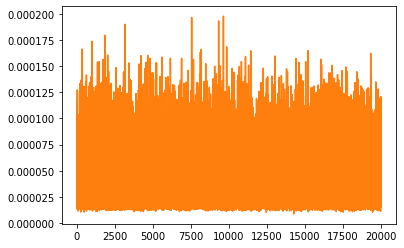

In [63]:
import matplotlib.pyplot as plt

plt.plot(sim7["afs"][:, 0:2])

In [39]:
from mvl2.numpyro import model, infer

mcmc = infer(model, sim7["altCounts"].numpy(), simParams3["nCases"].numpy(), simParams3["nCtrls"].numpy())

sample: 100%|██████████| 1200/1200 [21:01<00:00,  1.05s/it, 63 steps of size 6.03e-02. acc. prob=0.85]

                 mean       std    median      5.0%     95.0%     n_eff     r_hat
    beta[0]      0.70      0.02      0.70      0.66      0.73    258.21      1.00
    beta[1]      0.44      0.04      0.44      0.38      0.51    284.21      1.00
    beta[2]      0.59      0.06      0.60      0.49      0.69    280.47      1.00
    beta[3]      1.00      0.00      1.00      1.00      1.00    169.62      1.00
    beta[4]      0.97      0.10      1.00      0.98      1.00   1115.23      1.00
    beta[5]      0.97      0.12      1.00      0.96      1.00   1129.77      1.00
    beta[6]      0.97      0.11      1.00      0.98      1.00   1018.78      1.00
    beta[7]      0.97      0.11      1.00      0.97      1.00   1077.73      1.00
    beta[8]      0.97      0.12      1.00      0.97      1.00   1031.33      1.00
    beta[9]      0.97      0.10      1.00      0.97      1.00    845.98     

In [40]:
from mvl2.numpyro import  get_inferred_params

res, probs, conc, pis, beta = get_inferred_params(mcmc)

probs mean [[0.61222166 0.16613865 0.17656207 0.04507761]
 [0.33355318 0.49351454 0.09926469 0.07366759]
 [0.46504841 0.14479512 0.3284944  0.06166207]
 [0.25127866 0.4016084  0.17182636 0.17528657]
 [0.07138395 0.17176518 0.20794736 0.54890351]
 [0.0757503  0.20652348 0.21121979 0.50650643]
 [0.07106047 0.21229612 0.19410769 0.52253571]
 [0.069363   0.21065852 0.2083032  0.51167528]
 [0.07216185 0.18415722 0.20166595 0.54201498]
 [0.0642354  0.21925429 0.20888875 0.50762155]
 [0.07273806 0.20493759 0.1881003  0.53422406]
 [0.07673627 0.18121546 0.19849864 0.54354963]]
inferred stick-breaking weights mean:  [0.69614923 0.13305683 0.10337238 0.06946892 0.00101382 0.00092916
 0.00099078 0.000999   0.000999   0.000999   0.000999   0.000999  ]
inferred stick-breaking weights stdd:  [0.02671521 0.01776951 0.02519889 0.03020335 0.03159096 0.02938075
 0.03133122 0.03159119 0.03159119 0.03159119 0.03159119 0.03159119]


In [58]:
beta[0, ]

DeviceArray([0.73251929, 0.51674345, 0.46680692, 1.        , 1.        ,
             0.93003008, 0.99177084, 1.        , 1.        , 1.        ,
             1.        ], dtype=float64)

In [59]:
from mvl2.numpyro import model_mvn

mcmc = infer(model_mvn, sim7["altCounts"].numpy(), simParams3["nCases"].numpy(), simParams3["nCtrls"].numpy())

AttributeError: 'DeviceArray' object has no attribute 'sqrt'

In [41]:
empiricalAfs = sim7["altCounts"].sum(1) / (simParams3["nCtrls"] + simParams3["nCases"].sum())
empiricalAfs = empiricalAfs.expand([4, 20_000]).T
print(empiricalAfs)
print(empiricalAfs[sim7["unaffectedGenes"]].mean(0))
print(empiricalAfs[sim7["affectedGenes"][0]].mean(0))
print(empiricalAfs[sim7["affectedGenes"][1]].mean(0))
print(empiricalAfs[sim7["affectedGenes"][2]].mean(0))


tensor([[0.0002, 0.0002, 0.0002, 0.0002],
        [0.0001, 0.0001, 0.0001, 0.0001],
        [0.0001, 0.0001, 0.0001, 0.0001],
        ...,
        [0.0001, 0.0001, 0.0001, 0.0001],
        [0.0001, 0.0001, 0.0001, 0.0001],
        [0.0001, 0.0001, 0.0001, 0.0001]], dtype=torch.float64)
tensor([0.0001, 0.0001, 0.0001, 0.0001], dtype=torch.float64)
tensor([0.0002, 0.0002, 0.0002, 0.0002], dtype=torch.float64)
tensor([0.0001, 0.0001, 0.0001, 0.0001], dtype=torch.float64)
tensor([0.0002, 0.0002, 0.0002, 0.0002], dtype=torch.float64)


In [42]:
(sim7["afs"][sim7["unaffectedGenes"]] / empiricalAfs[sim7["unaffectedGenes"]]).mean(0)

tensor([0.5637, 0.1679, 0.1679, 0.0448], dtype=torch.float64)

In [43]:
(sim7["afs"][sim7["affectedGenes"][0]] / empiricalAfs[sim7["affectedGenes"][0]]).mean(0)

tensor([0.3153, 0.4830, 0.0976, 0.0716], dtype=torch.float64)

In [44]:
(sim7["afs"][sim7["affectedGenes"][1]] / empiricalAfs[sim7["affectedGenes"][1]]).mean(0)

tensor([0.4689, 0.1413, 0.2826, 0.0595], dtype=torch.float64)

In [45]:
(sim7["afs"][sim7["affectedGenes"][2]] / empiricalAfs[sim7["affectedGenes"][2]]).mean(0)

tensor([0.2548, 0.3918, 0.1574, 0.1688], dtype=torch.float64)

In [ ]:
# Repeat this 1000 times
# Report the empiricial confidence intervals; standard error in the estimate across

# 10 or 20 parameter combinations total

# Need to get genetic correlation out
# Think about scaling it in a way you can talk about it
# Total heritability, number of genes that explain that total heritability
# Proportion 
# Variance explained by the 
# Proprotion of variance explained by the locus 

# I need to get back meanEffect for each gene
# allele frequency for each gene
# calculative proportion of variance explained / total heritability, and hat is 2*(p*effect^2  + q*effect^2)

# phenotypic correlation <= genetic correlation
# with phenotypic residuals; make them not colinear with my genetics
# don't make phenotypic look just like a



In [ ]:
# phenotypic should be bigger 
torch.eye([1., 2. ], [2., 1.])

# genetic covariance diagonal 
torch.eye([.8, .1], [.8, .2])

# if my total phe

phenotypic variance / covariance  !=  genoetypic variance / covariance